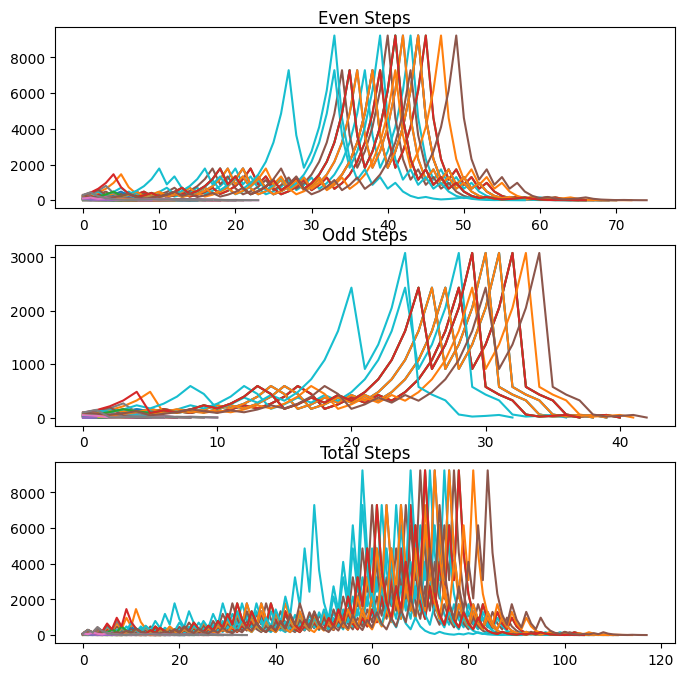

In [91]:
import  matplotlib.pyplot as plt
import CollatzChecker
collatz = CollatzChecker.CollatzChecker()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))
for num in range(2,100):
    even = collatz.even_steps_list(num)
    odd = collatz.odd_steps_list(num)
    steps = collatz.sequence_list(num)

    # print(f'Even Steps: {even}')
    # print(f'Odd Steps: {odd}')
    # print(f'Total Steps: {steps}')
    ax1.plot(even, label='Even Steps')
    ax2.plot(odd, label='Odd Steps',)
    ax3.plot(steps, label='Total Steps')
    ax1.set_title('Even Steps',pad=0)
    ax2.set_title('Odd Steps',pad=0)
    ax3.set_title('Total Steps',pad=0)
    num += 1

plt.show()

<Figure size 640x480 with 0 Axes>

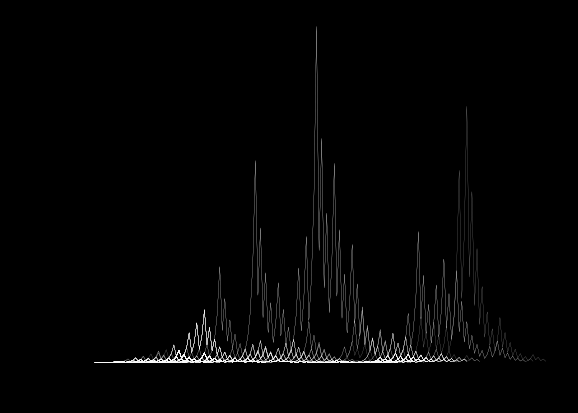

In [93]:

plt.figure(dpi=100)
plt.figure(facecolor='black')  
plt.axes().set_facecolor('black')
for num in range(2,1000):
    steps = collatz.sequence_list(num)
    # print(f'Total Steps: {steps}')
    reversed_steps = steps[::-1]
    # print(f'Total Steps: {reversed_steps}')
    plt.plot(reversed_steps, label='Total Steps',color='white',linewidth=0.1,markersize=0,marker='o')
    num += 1


plt.savefig('plot.png', dpi=200, facecolor='black')
plt.show()